In [1]:
import pandas as pd

df= pd.read_csv('Online_Retail_Cleaned.csv')

In [2]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total Price'],
      dtype='object')

In [5]:
df=df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','Total Price']]

In [6]:
from lifetimes.utils import summary_data_from_transaction_data

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
summary = summary_data_from_transaction_data(df, customer_id_col='CustomerID', datetime_col='InvoiceDate',monetary_value_col='Total Price', 
                                             observation_period_end=df['InvoiceDate'].max())

In [9]:
summary.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346,0.0,0.0,325.0,0.000000
12347,6.0,365.0,367.0,599.701667
12348,3.0,283.0,358.0,261.480000
12349,0.0,0.0,18.0,0.000000
12350,0.0,0.0,310.0,0.000000


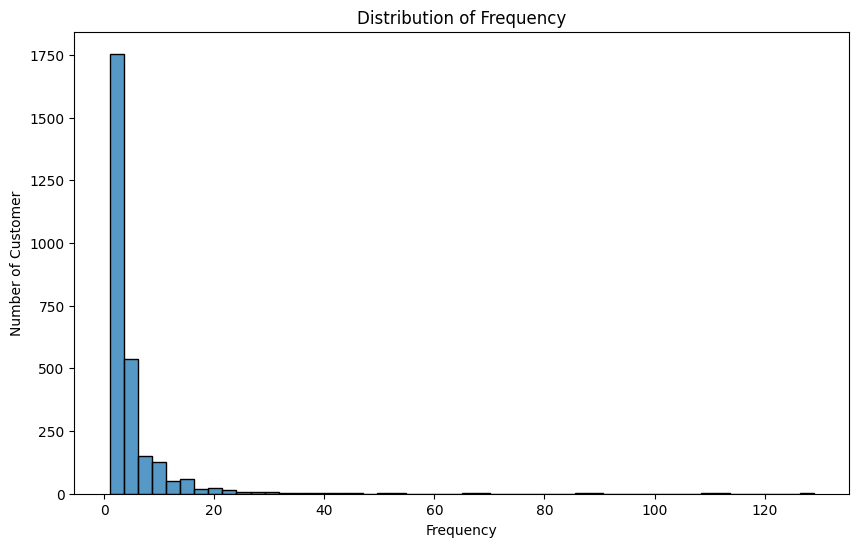

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_frequency = summary[summary['frequency']>0]

plt.figure(figsize=(10,6))
sns.histplot(summary_frequency['frequency'], bins=50, kde=False)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of Customer')
plt.show()

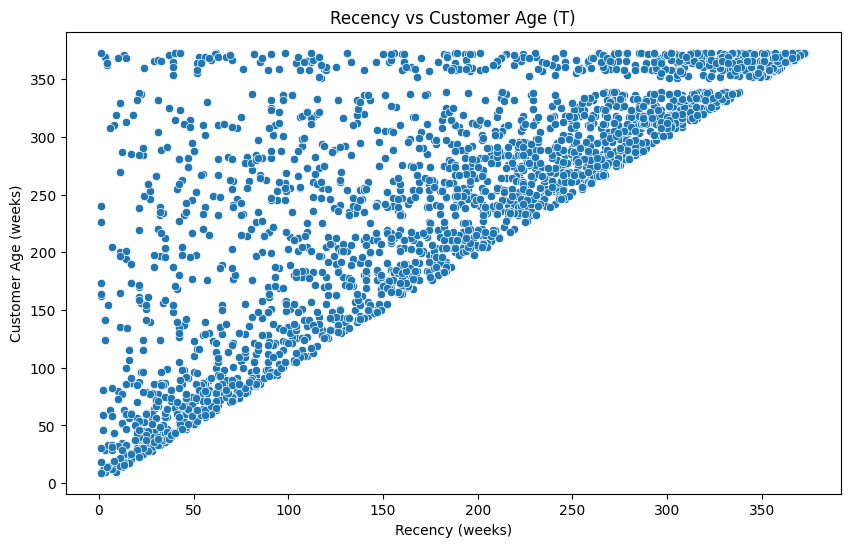

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=summary_frequency, x='recency', y='T')
plt.title('Recency vs Customer Age (T)')
plt.xlabel('Recency (weeks)')
plt.ylabel('Customer Age (weeks)')
plt.show()

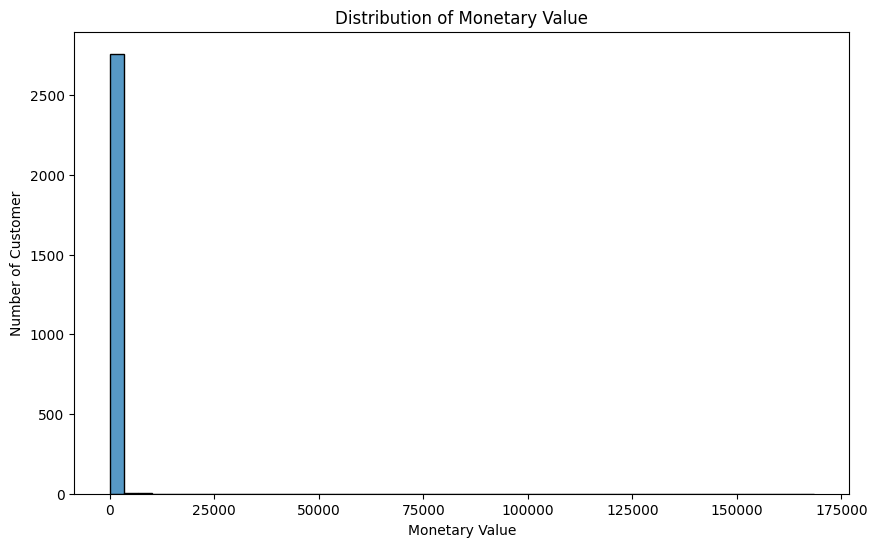

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(summary_frequency['monetary_value'], bins=50)
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Number of Customer')
plt.show()

In [13]:
summary_frequency.to_csv('Data_for_Modeling.csv', index=True)